In [168]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [169]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [170]:
df_a = pd.read_csv('C:\\Users\\DaFon\\Desktop\\fulldata\\group-a\\output.csv')
df_b = pd.read_csv('C:\\Users\\DaFon\\Desktop\\fulldata\\group-b\\output.csv')
df_c = pd.read_csv('C:\\Users\\DaFon\\Desktop\\fulldata\\group-c\\output.csv')

In [171]:
df_a = df_a[df_a['numberOfClicks'].notna()]
df_b = df_b[df_b['numberOfClicks'].notna()]
df_c = df_c[df_c['numberOfClicks'].notna()]

print(df_a.columns)
# display(df_a)

Index(['Timestamp', 'prolificId', 'familiarity', 'response', 'reason',
       'confidence', 'Problems', 'Search Term', 'Total Search Time in s',
       'Actions', 'numberOfClicks', 'ClickedFeatured', 'timeSpentOnFeatured',
       'clickedFirst', 'timeSpentOnFirst', 'clickedSecond',
       'timeSpentOnSecond', 'clickedThird', 'timeSpentOnThird',
       'clickedFourth', 'timeSpentOnFourth', 'clickedFifth',
       'timeSpentOnFifth', 'clickedSixth', 'timeSpentOnSixth', 'session_id',
       'participant_id', 'status', 'started_datetime', 'completed_date_time',
       'time_taken', 'age', 'num_approvals', 'num_rejections',
       'prolific_score', 'reviewed_at_datetime', 'entered_code',
       'Country of Birth', 'Current Country of Residence', 'Employment Status',
       'First Language', 'Fluent languages', 'Nationality', 'Sex',
       'Student Status'],
      dtype='object')


In [172]:
# due to the window.onfocus() function not being fully supported on safari browser
# there are some files with inconsistent focus timestamps
# they are excluded for the calculation of time spent on a certain page
toBeExcludedA = ["5f509d5a47022a214fab7d46", 
                "5fb6de74ff456813688f32fc", 
                "60fd53b7ece85e2d83a65501", 
                "60b922aaef24b038cb35b258", 
                "6116875aaf3dfaa62184910a", 
                "5d9487e7c53cec001cfbf937"]

toBeExcludedB = ["61169b076dc10a72e54fc4f0",
                "6102d660e2f09dd991f8a13c",
                "614e0c879b735505d46f7d27",
                "60284181e4c6ff174a6ce964",
                "60ccbd6213c0485029e86d97",
                "612960e2e6efe4d29fcf8634",
                "615d9a6f4628e9902be16e88",
                "5f1799b7914250141b4ce3ff",
                "61758dd4ab7ec0d91a929f3d",
                "614c94c524c94bce8bc49f85"]

toBeExcludedC = ["615591b8814426404194e181",
                "5f136634744bae3689117234",
                "60ddea5d8baf96fbbc7cd59f",
                "5ea171c1a8782801263e7540",
                "5fb240c0a9c3227c6c69d7ce",
                "5e9f21ddba8f030919ee4d41",
                "603a20d298921e5ac2e52d74",
                "6139387d9b889ecc4f5ad022",
                "5a7875355292b80001227f63"]

df_a2 = df_a[~df_a['prolificId'].isin(toBeExcludedA)]
df_b2 = df_b[~df_b['prolificId'].isin(toBeExcludedB)]
df_c2 = df_c[~df_c['prolificId'].isin(toBeExcludedC)]

In [173]:
c0 = df_a2['ClickedFeatured'].sum()
t0 = df_a2['timeSpentOnFeatured'].mean()
c1 = df_a2['clickedFirst'].sum()
t1 = df_a2['timeSpentOnFirst'].mean()
c2 = df_a2['clickedSecond'].sum()
t2 = df_a2['timeSpentOnSecond'].mean()
c3 = df_a2['clickedThird'].sum()
t3 = df_a2['timeSpentOnThird'].mean()
c4 = df_a2['clickedFourth'].sum()
t4 = df_a2['timeSpentOnFourth'].mean()
c5 = df_a2['clickedFifth'].sum()
t5 = df_a2['timeSpentOnFifth'].mean()
c6 = df_a2['clickedSixth'].sum()
t6 = df_a2['timeSpentOnSixth'].mean()

allClicks = [c0,c1,c2,c3,c4,c5,c6]
allTimeSpent = [t0,t1,t2,t3,t4,t5,t6]

data = [[0, c0, t0],
        [1, allClicks[1], allTimeSpent[1]],
        [2, allClicks[2], allTimeSpent[2]],
        [3, allClicks[3], allTimeSpent[3]],
        [4, allClicks[4], allTimeSpent[4]],
        [5, allClicks[5], allTimeSpent[5]],
        [6, allClicks[6], allTimeSpent[6]]]

df_rank_a = pd.DataFrame(data, columns=['Rank', 'Clicks', 'Time Spent on Average'])

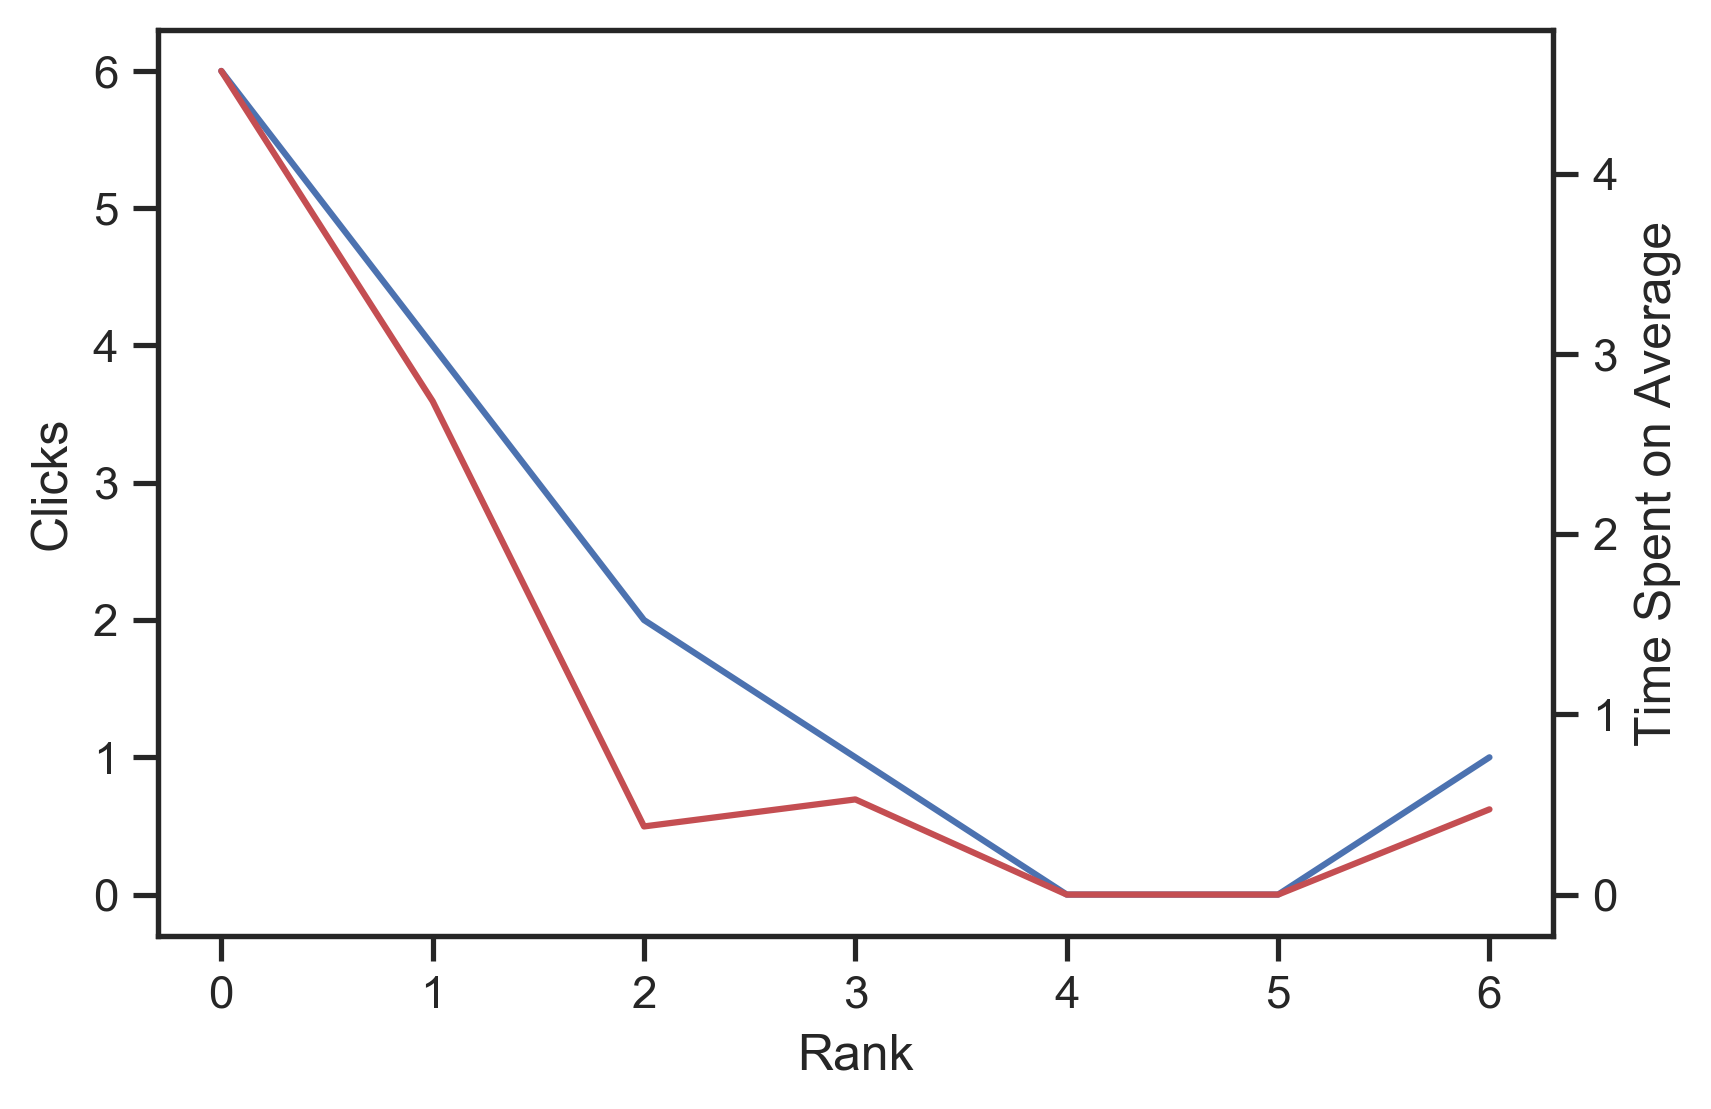

In [174]:
sns.lineplot(data=df_rank_a, x="Rank", y="Clicks", color="b")
ax2 = plt.twinx()
plot = sns.lineplot(data=df_rank_a, x="Rank", y="Time Spent on Average", color="r")
fig = plot.get_figure()
fig.savefig("clicks-and-time-a.png", dpi=300, bbox_inches = "tight")

In [79]:
c1 += df_b2['clickedFirst'].sum()
t1 += df_b2['timeSpentOnFirst'].mean()
c2 += df_b2['clickedSecond'].sum()
t2 += df_b2['timeSpentOnSecond'].mean()
c3 += df_b2['clickedThird'].sum()
t3 += df_b2['timeSpentOnThird'].mean()
c4 += df_b2['clickedFourth'].sum()
t4 += df_b2['timeSpentOnFourth'].mean()
c5 += df_b2['clickedFifth'].sum()
t5 += df_b2['timeSpentOnFifth'].mean()
c6 += df_b2['clickedSixth'].sum()
t6 += df_b2['timeSpentOnSixth'].mean()

allClicks = [c0,c1,c2,c3,c4,c5,c6]
allTimeSpent = [t0,t1,t2,t3,t4,t5,t6]

data = [[1, allClicks[1], allTimeSpent[1]],
        [2, allClicks[2], allTimeSpent[2]],
        [3, allClicks[3], allTimeSpent[3]],
        [4, allClicks[4], allTimeSpent[4]],
        [5, allClicks[5], allTimeSpent[5]],
        [6, allClicks[6], allTimeSpent[6]]]

df_rank_b = pd.DataFrame(data, columns=['Rank', 'Clicks', 'Time Spent on Average'])

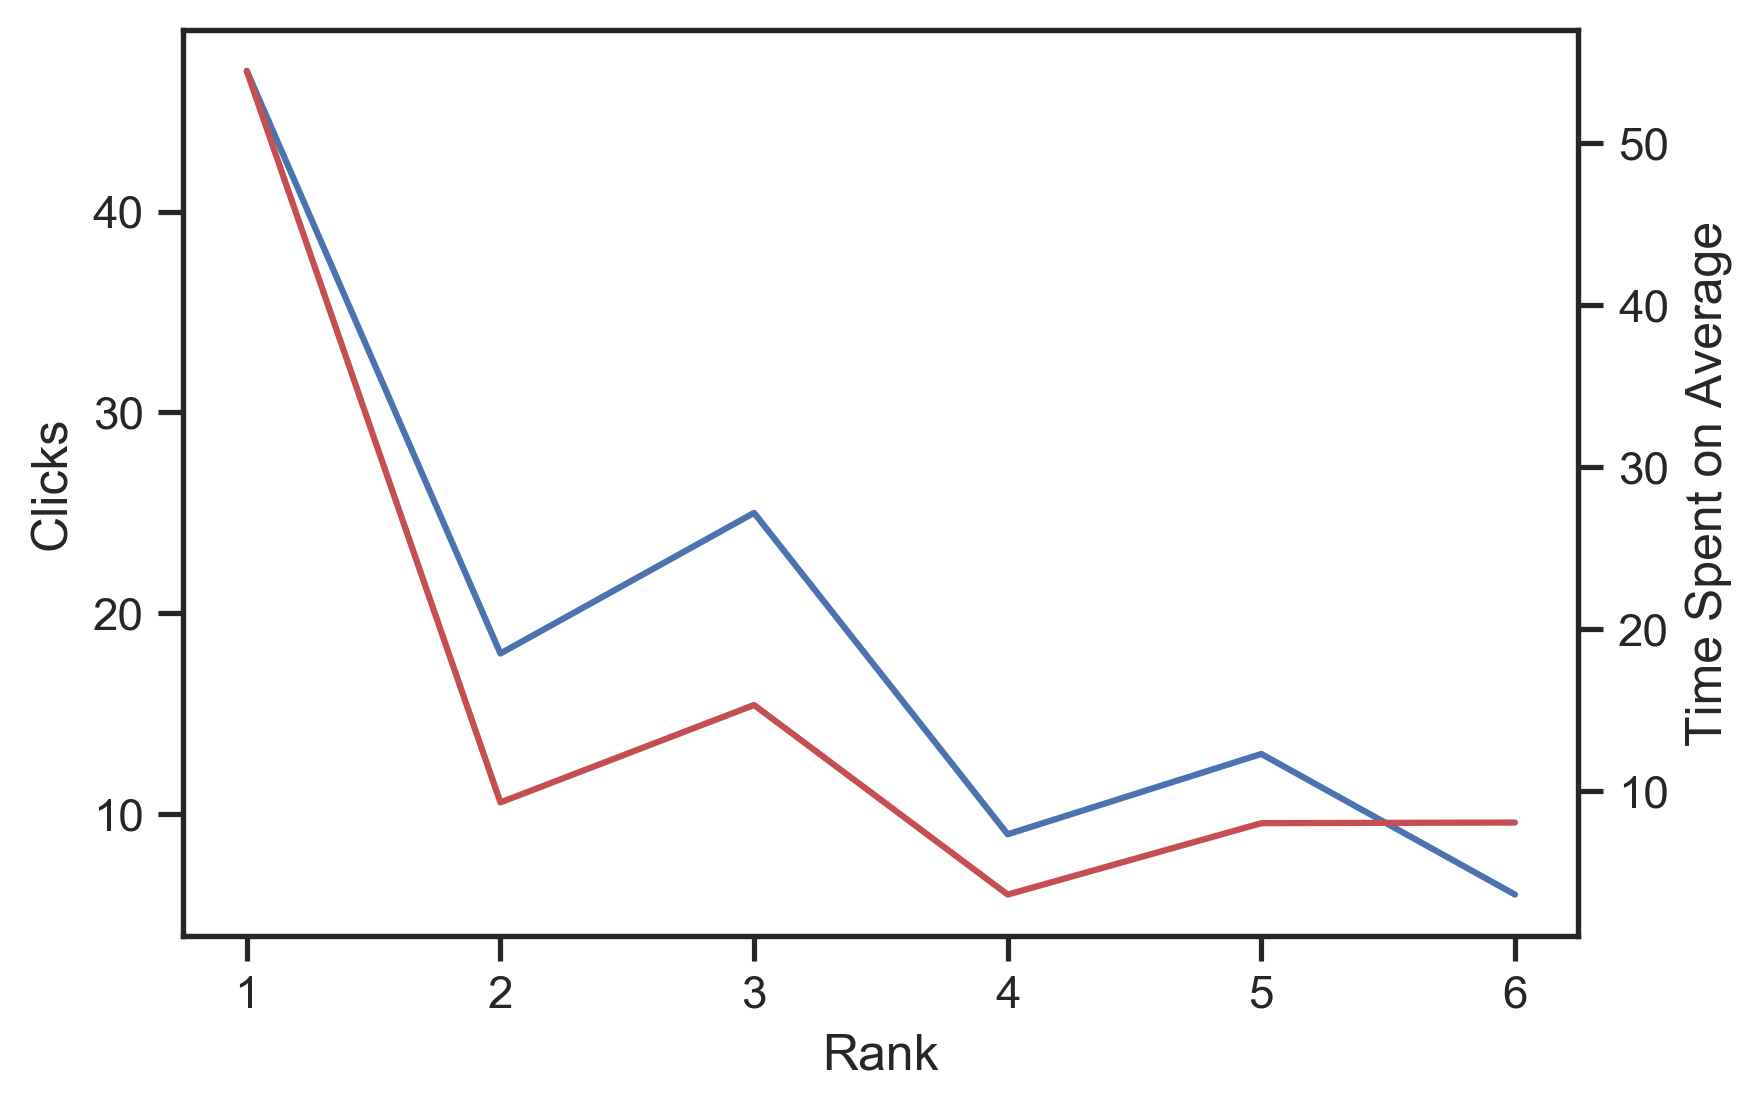

In [167]:
sns.lineplot(data=df_rank_b, x="Rank", y="Clicks", color="b")
ax2 = plt.twinx()
plot = sns.lineplot(data=df_rank_b, x="Rank", y="Time Spent on Average", color="r")
fig = plot.get_figure()
fig.savefig("clicks-and-time-b.png", dpi=300, bbox_inches = "tight")

In [81]:
c0 += df_c2['ClickedFeatured'].sum()
t0 += df_c2['timeSpentOnFeatured'].mean()
c1 += df_c2['clickedFirst'].sum()
t1 += df_c2['timeSpentOnFirst'].mean()
c2 += df_c2['clickedSecond'].sum()
t2 += df_c2['timeSpentOnSecond'].mean()
c3 += df_c2['clickedThird'].sum()
t3 += df_c2['timeSpentOnThird'].mean()
c4 += df_c2['clickedFourth'].sum()
t4 += df_c2['timeSpentOnFourth'].mean()
c5 += df_c2['clickedFifth'].sum()
t5 += df_c2['timeSpentOnFifth'].mean()
c6 += df_c2['clickedSixth'].sum()
t6 += df_c2['timeSpentOnSixth'].mean()

allClicks = [c0,c1,c2,c3,c4,c5,c6]
allTimeSpent = [t0,t1,t2,t3,t4,t5,t6]

data = [[0, c0, t0],
        [1, allClicks[1], allTimeSpent[1]],
        [2, allClicks[2], allTimeSpent[2]],
        [3, allClicks[3], allTimeSpent[3]],
        [4, allClicks[4], allTimeSpent[4]],
        [5, allClicks[5], allTimeSpent[5]],
        [6, allClicks[6], allTimeSpent[6]]]

df_rank_c = pd.DataFrame(data, columns=['Rank', 'Clicks', 'Time Spent on Average'])

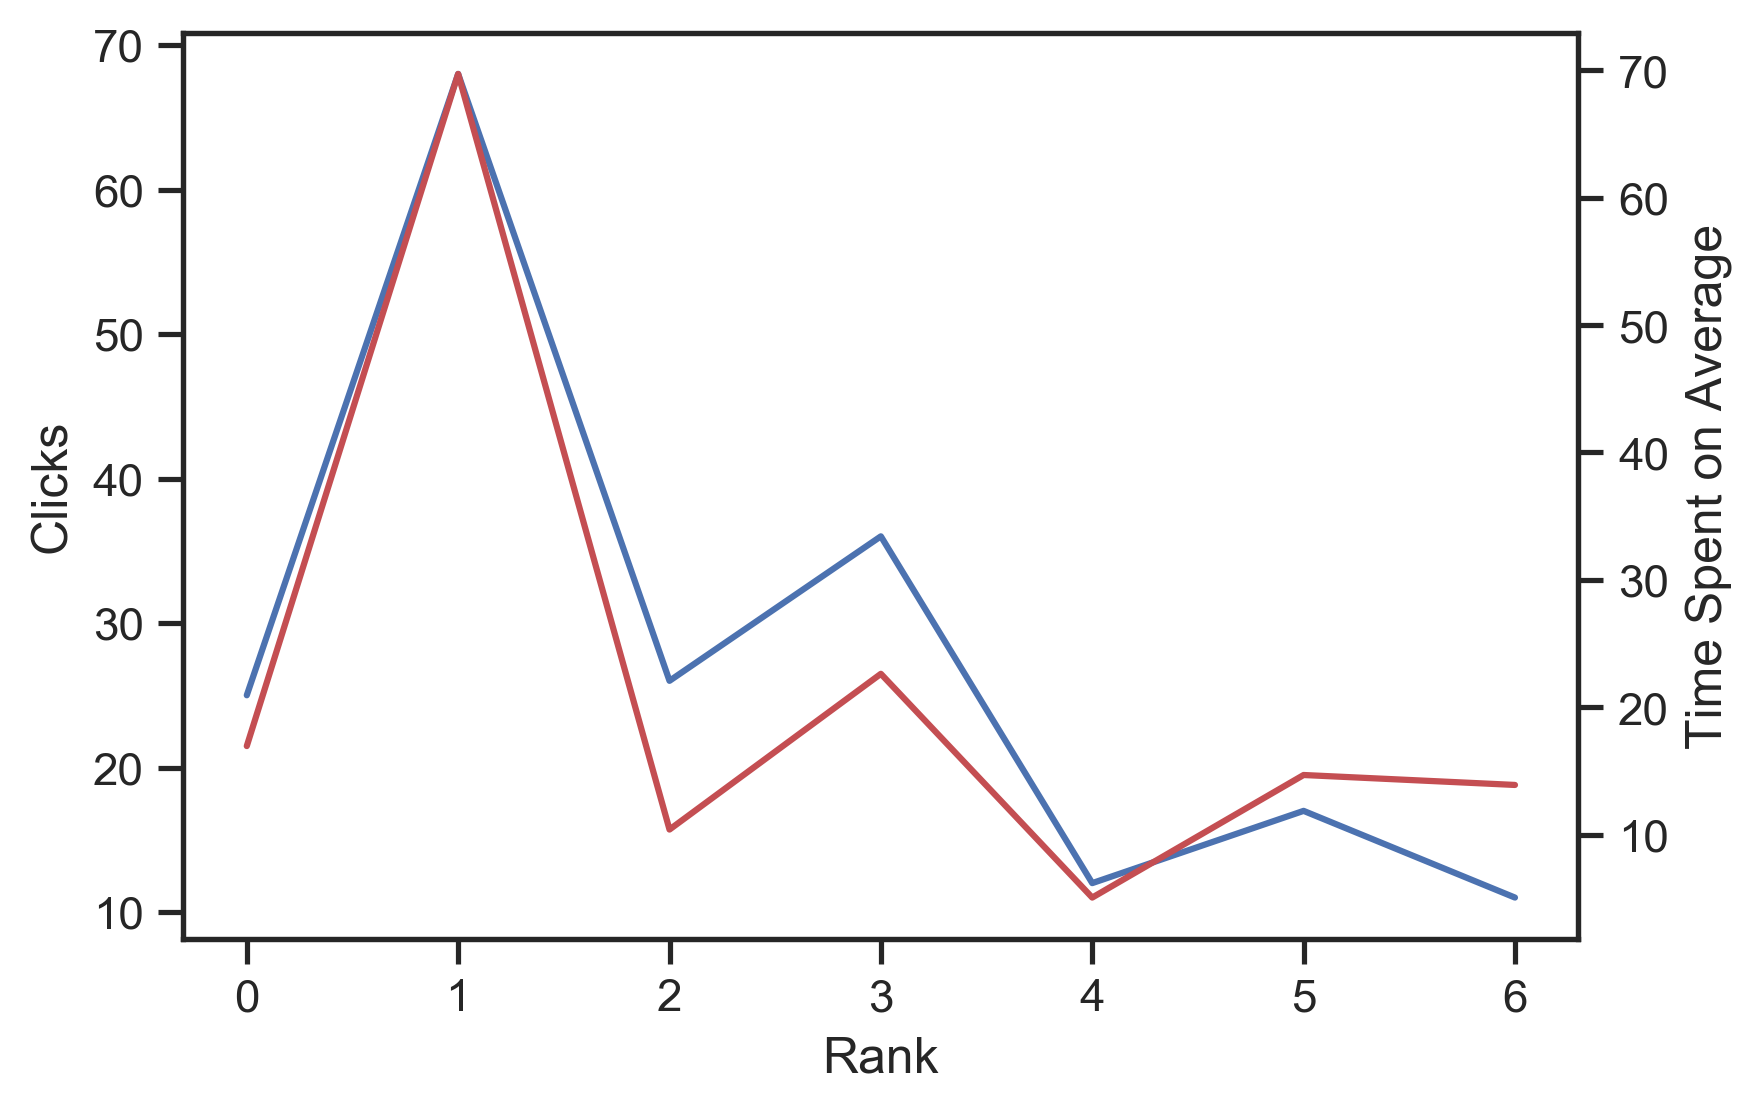

In [175]:
sns.lineplot(data=df_rank_c, x="Rank", y="Clicks", color="b")
ax2 = plt.twinx()
plot = sns.lineplot(data=df_rank_c, x="Rank", y="Time Spent on Average", color="r")
fig = plot.get_figure()
fig.savefig("clicks-and-time-c.png", dpi=300, bbox_inches = "tight")

In [96]:
a_total = df_a['Total Search Time in s'].mean()
b_total = df_b['Total Search Time in s'].mean()
c_total = df_c['Total Search Time in s'].mean()
a_clicks = df_a['numberOfClicks'].mean()
b_clicks = df_b['numberOfClicks'].mean()
c_clicks = df_c['numberOfClicks'].mean()
a_conf = df_a['confidence'].mean()
b_conf = df_b['confidence'].mean()
c_conf = df_c['confidence'].mean()
a_correct = 100 / (df_a['response'].value_counts()[0] + df_a['response'].value_counts()[1]) * df_a['response'].value_counts()[0]
b_correct = 100 / (df_b['response'].value_counts()[0] + df_b['response'].value_counts()[1]) * df_b['response'].value_counts()[0]
c_correct = 100 / (df_c['response'].value_counts()[0] + df_c['response'].value_counts()[1]) * df_c['response'].value_counts()[0]

In [84]:
data = [['Featured Snippet\nComplete Answer', a_total],
        ['No Featured\nSnippet', b_total],
        ['Featured Snippet\nPartial Answer', c_total]]
df_total_time = pd.DataFrame(data, columns=['Group', 'Total Search Time'])

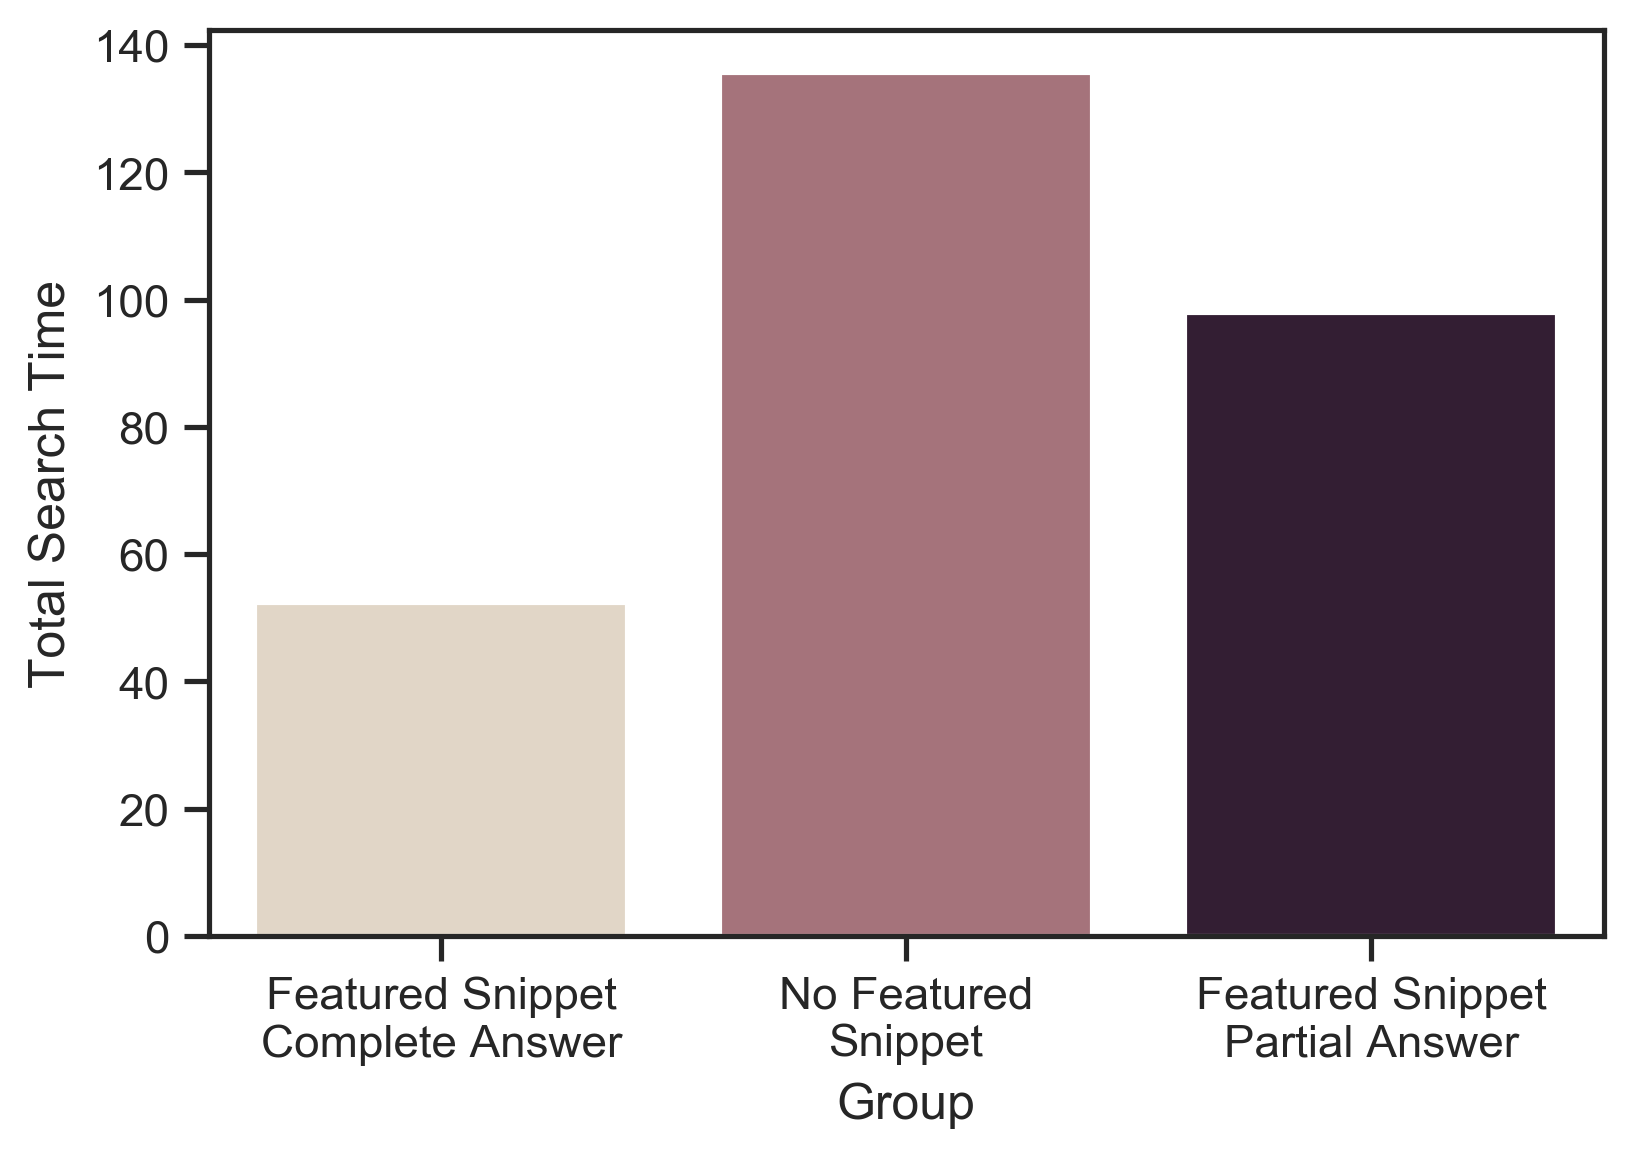

In [165]:
plot = sns.barplot(x="Group", y="Total Search Time", palette="ch:.25", data=df_total_time)
fig = plot.get_figure()
fig.savefig("total-time.png", dpi=300, bbox_inches = "tight")

In [86]:
data = [['Featured Snippet\nComplete Answer', a_clicks],
        ['No Featured\nSnippet', b_clicks],
        ['Featured Snippet\nPartial Answer', c_clicks]]
df_clicks = pd.DataFrame(data, columns=['Group', 'Average Number of Clicks'])

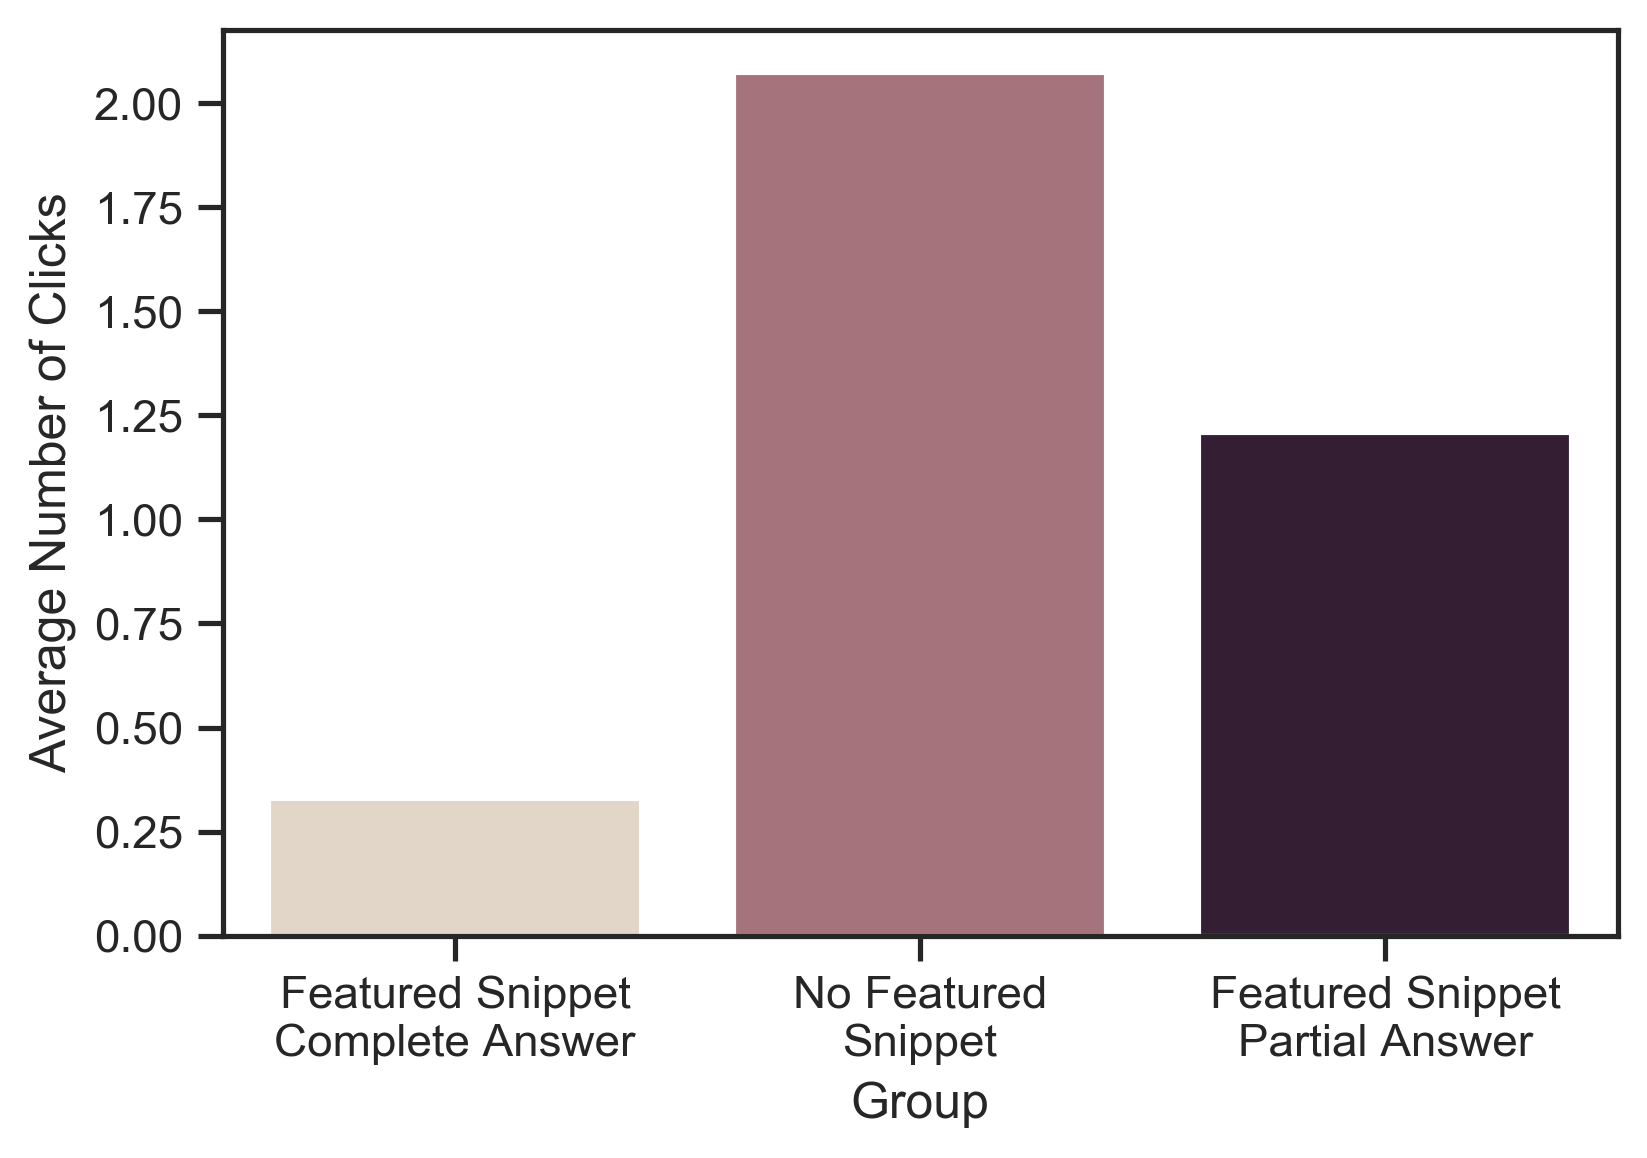

In [176]:
plot = sns.barplot(x="Group", y="Average Number of Clicks", palette="ch:.25", data=df_clicks)
fig = plot.get_figure()
fig.savefig("clicks.png", dpi=300, bbox_inches = "tight")

In [88]:
data = [['Featured Snippet\nComplete Answer', a_conf],
        ['No Featured\nSnippet', b_conf],
        ['Featured Snippet\nPartial Answer', c_conf]]
df_confidence = pd.DataFrame(data, columns=['Group', 'Average Confidence'])

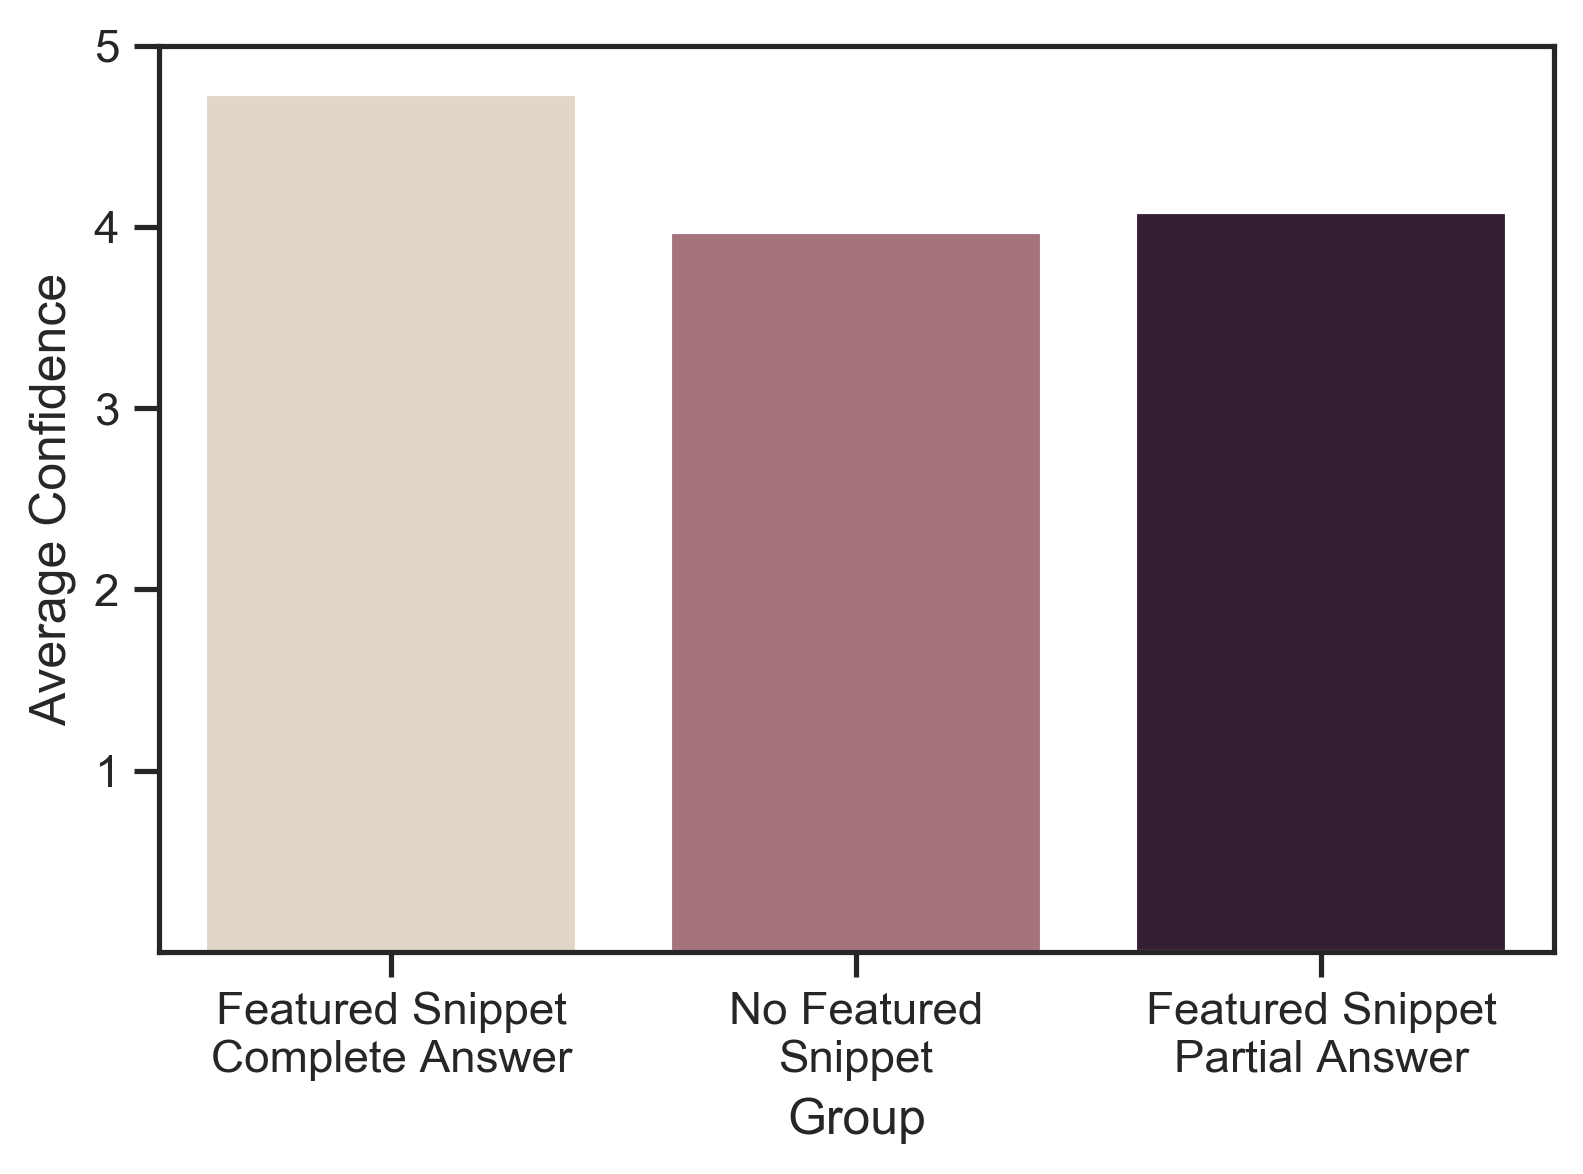

In [188]:
plot = sns.barplot(x="Group", y="Average Confidence", palette="ch:.25", data=df_confidence)
plot.set_yticks([1, 2, 3, 4, 5])
plot.set_yticklabels([1, 2, 3, 4, 5])
fig = plot.get_figure()
fig.savefig("confidence.png", dpi=300, bbox_inches = "tight")

In [90]:
data = [['Featured Snippet\nComplete Answer', a_correct],
        ['No Featured\nSnippet', b_correct],
        ['Featured Snippet\nPartial Answer', c_correct]]
df_correct = pd.DataFrame(data, columns=['Group', 'Percentage of Correct Answers'])

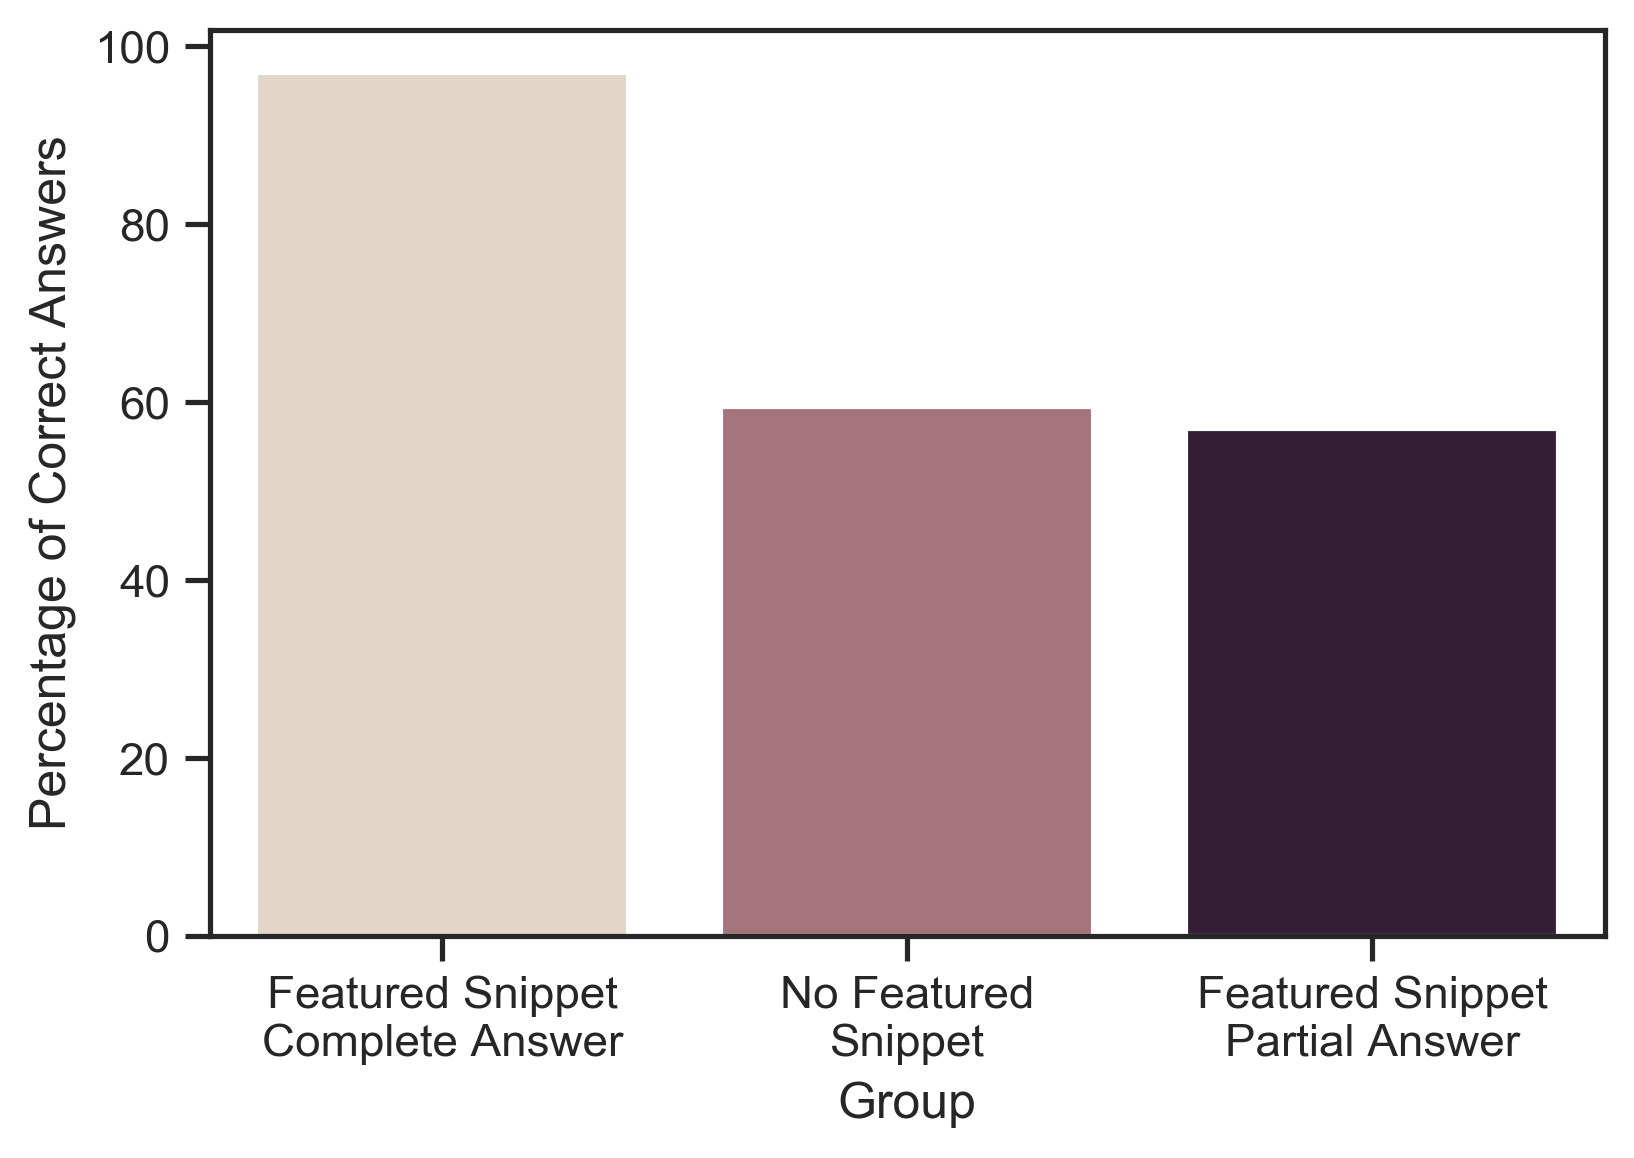

In [178]:
plot = sns.barplot(x="Group", y="Percentage of Correct Answers", palette="ch:.25", data=df_correct)
fig = plot.get_figure()
fig.savefig("answers.png", dpi=300, bbox_inches = "tight")

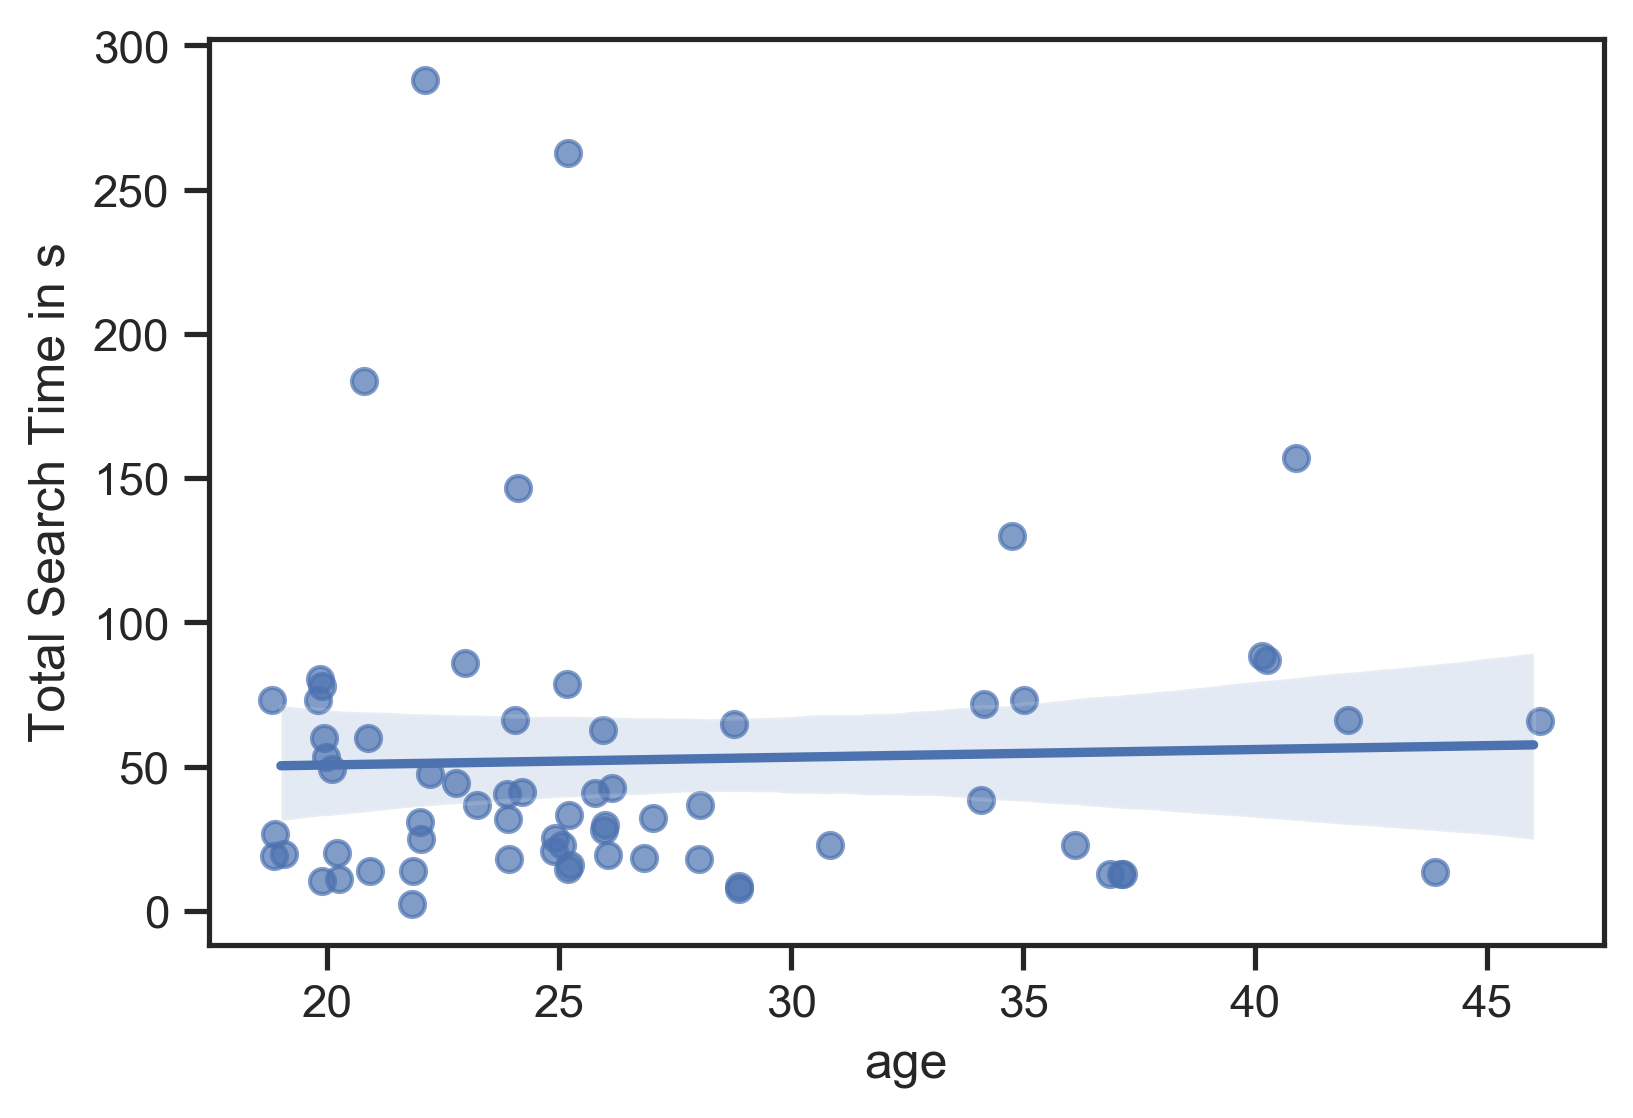

In [179]:
plot = sns.regplot(x="age", y="Total Search Time in s", data=df_a, x_jitter=.25, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-a-age-total-time.png", dpi=300, bbox_inches = "tight")

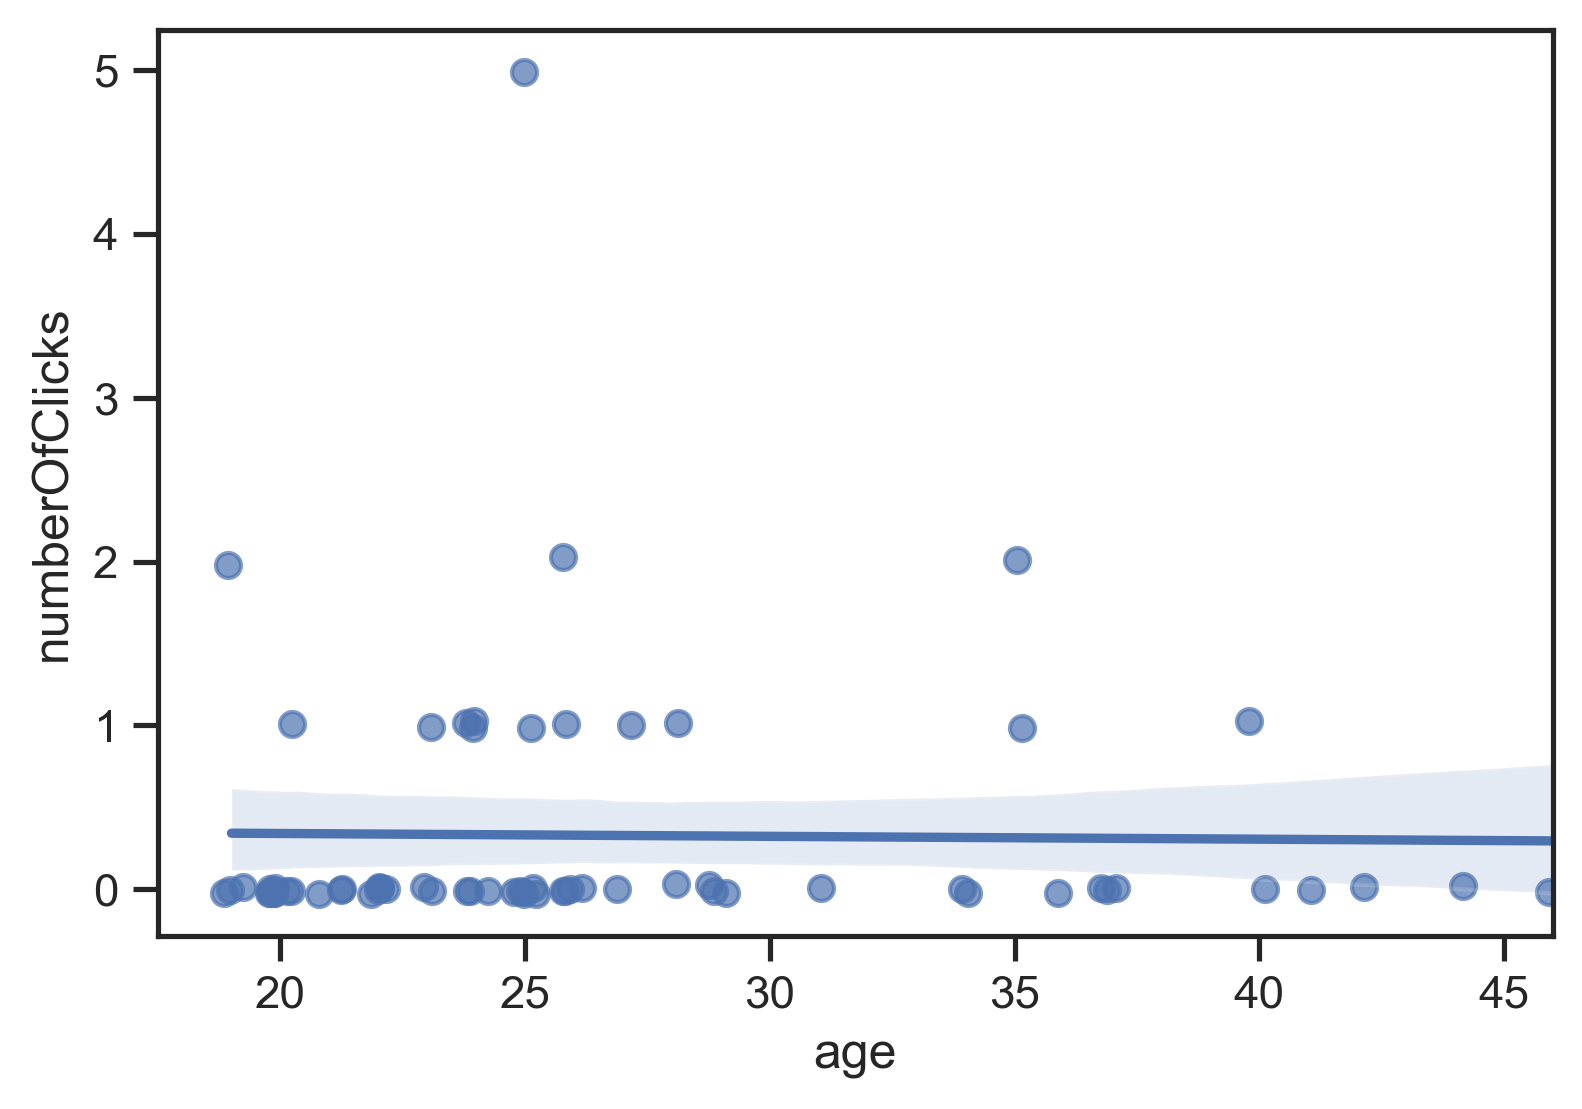

In [180]:
plot = sns.regplot(x="age", y="numberOfClicks", data=df_a, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-a-age-clicks.png", dpi=300, bbox_inches = "tight")

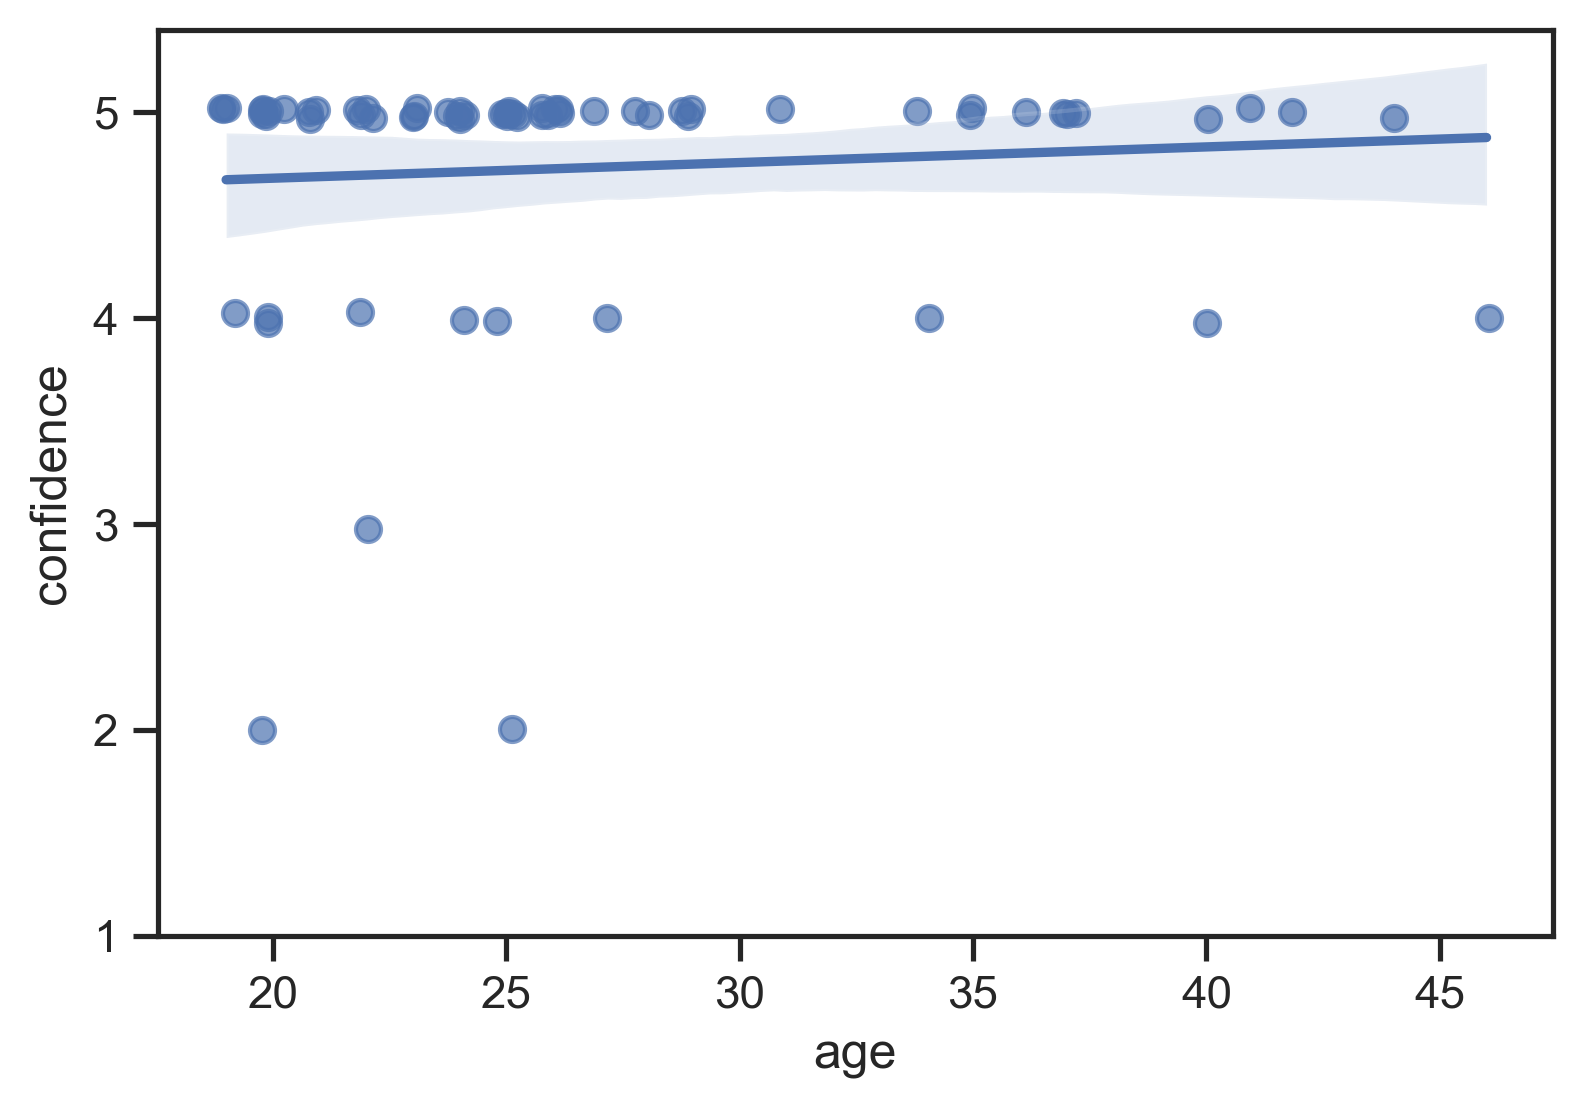

In [181]:
plot = sns.regplot(x="age", y="confidence", data=df_a, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
plot.set_yticks([1, 2, 3, 4, 5])
plot.set_yticklabels([1, 2, 3, 4, 5])
fig = plot.get_figure()
fig.savefig("group-a-age-confidence.png", dpi=300, bbox_inches = "tight")

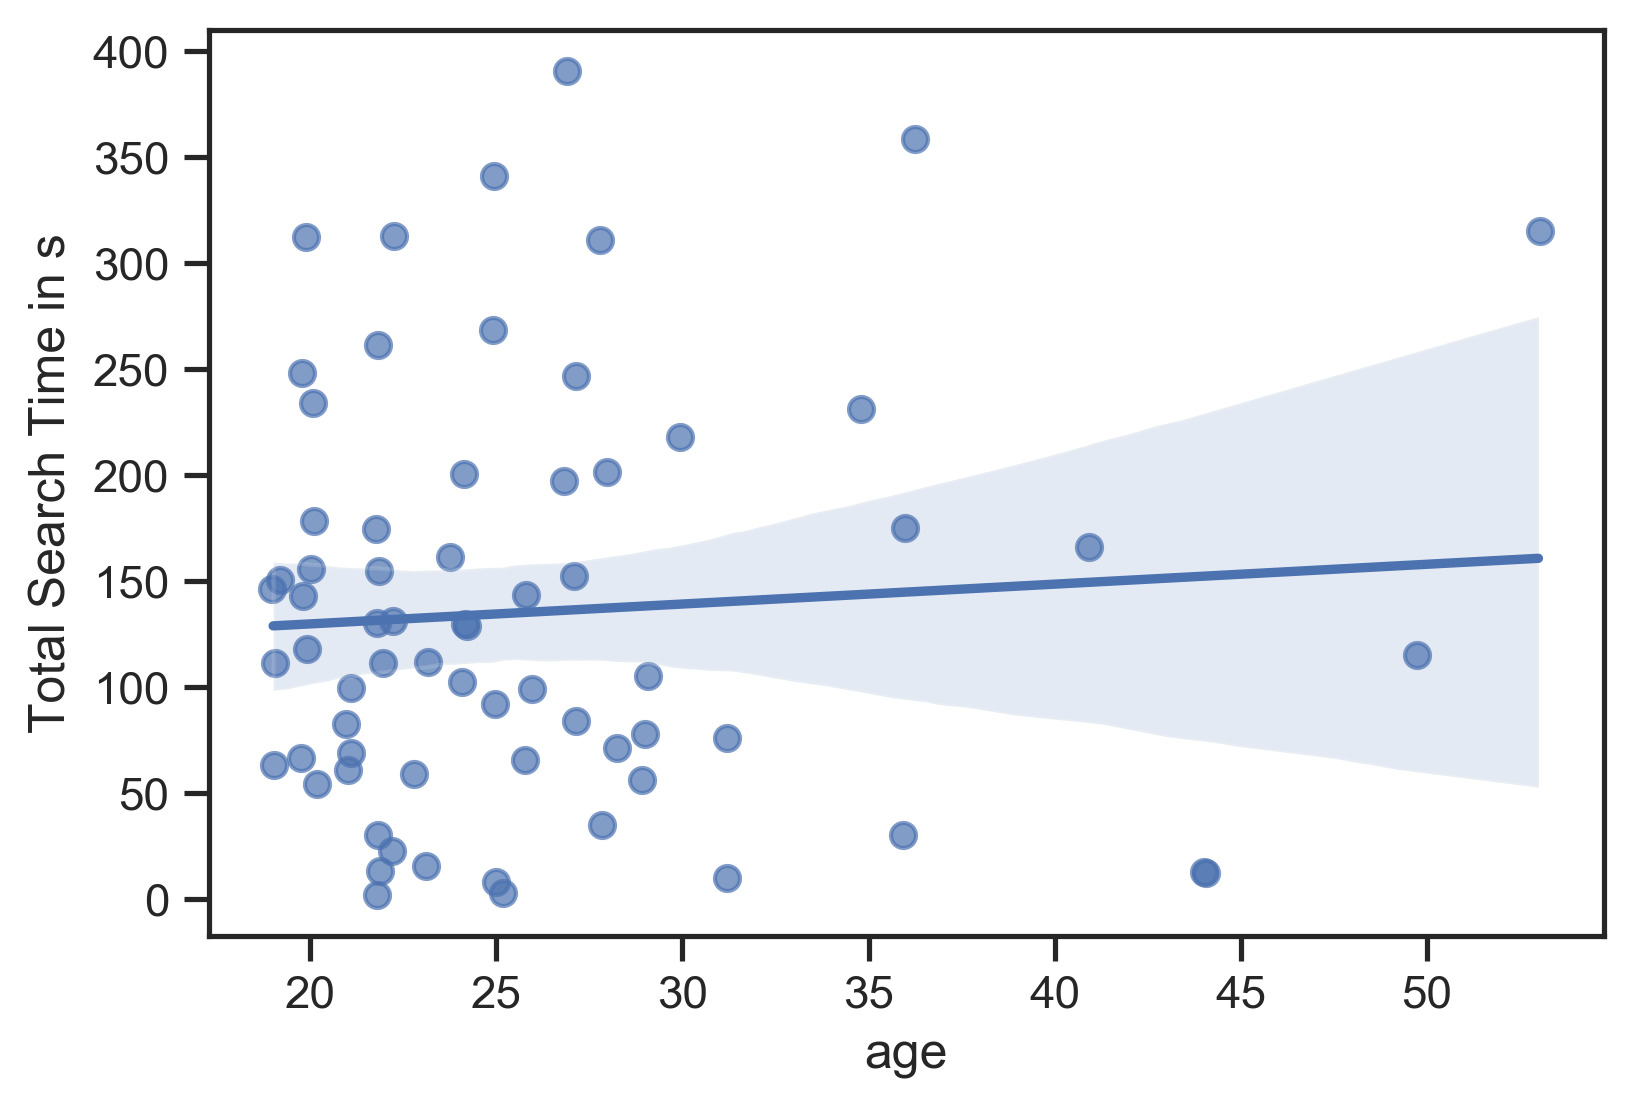

In [182]:
plot = sns.regplot(x="age", y="Total Search Time in s", data=df_b, x_jitter=.25, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-b-age-total-time.png", dpi=300, bbox_inches = "tight")

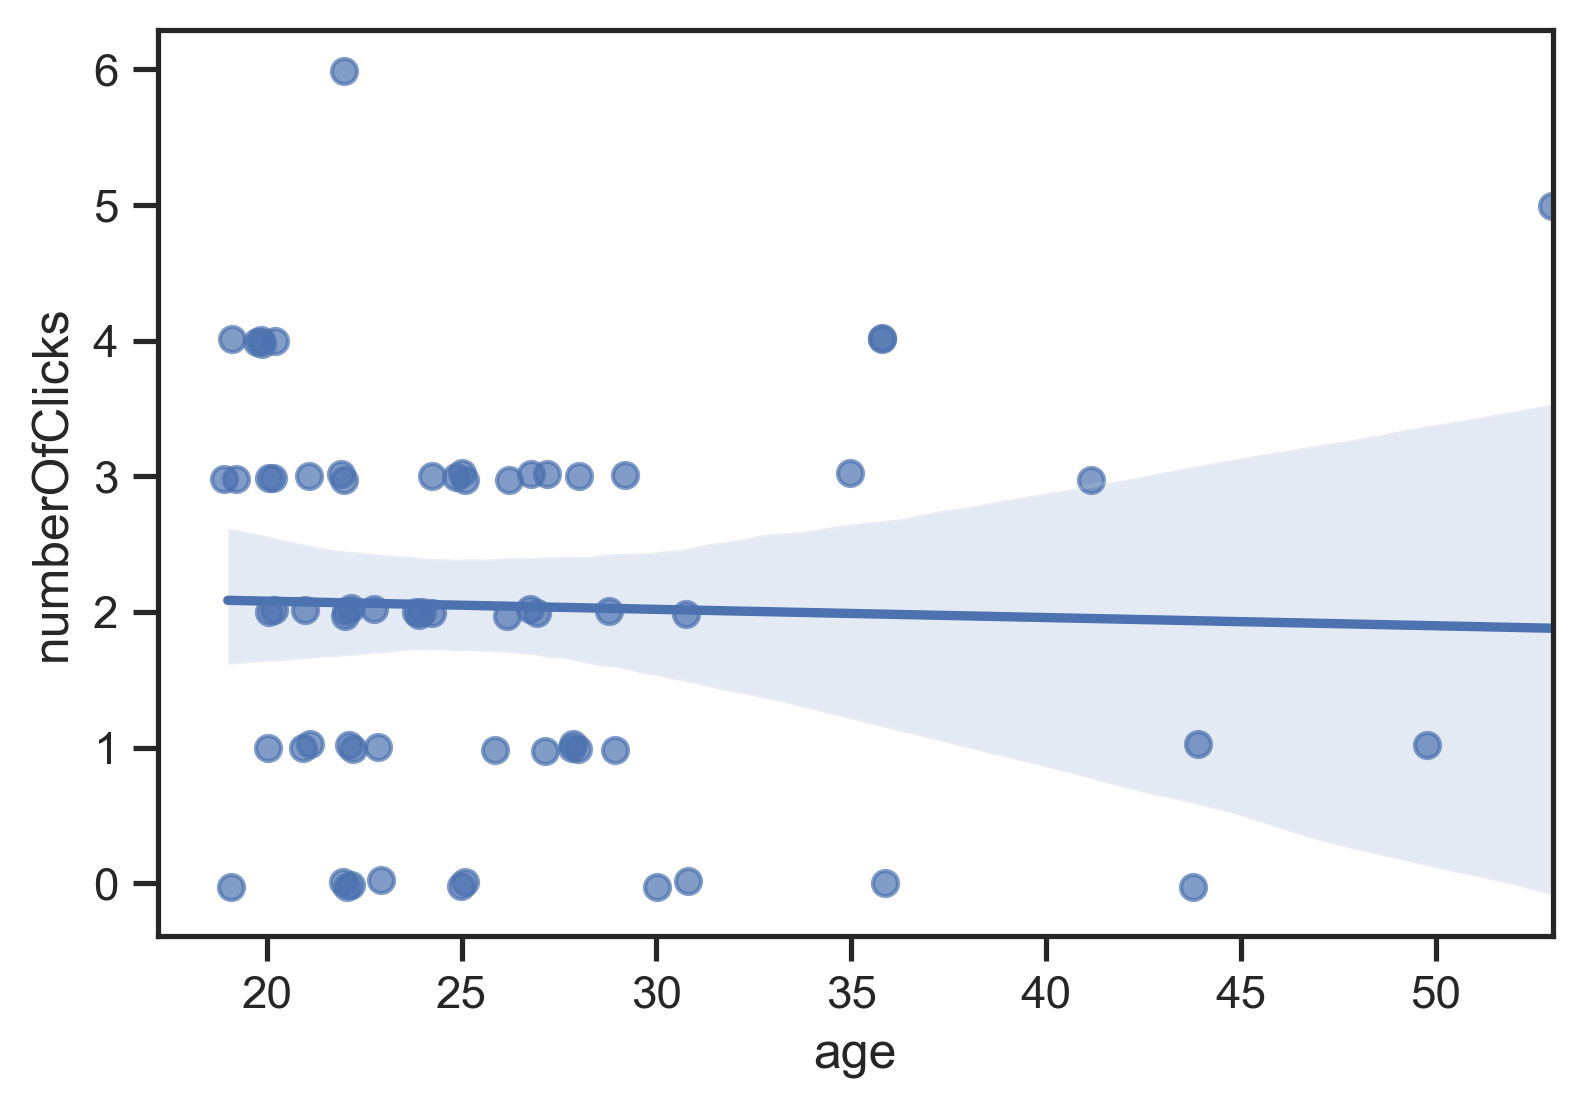

In [183]:
plot = sns.regplot(x="age", y="numberOfClicks", data=df_b, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-b-age-clicks.png", dpi=300, bbox_inches = "tight")

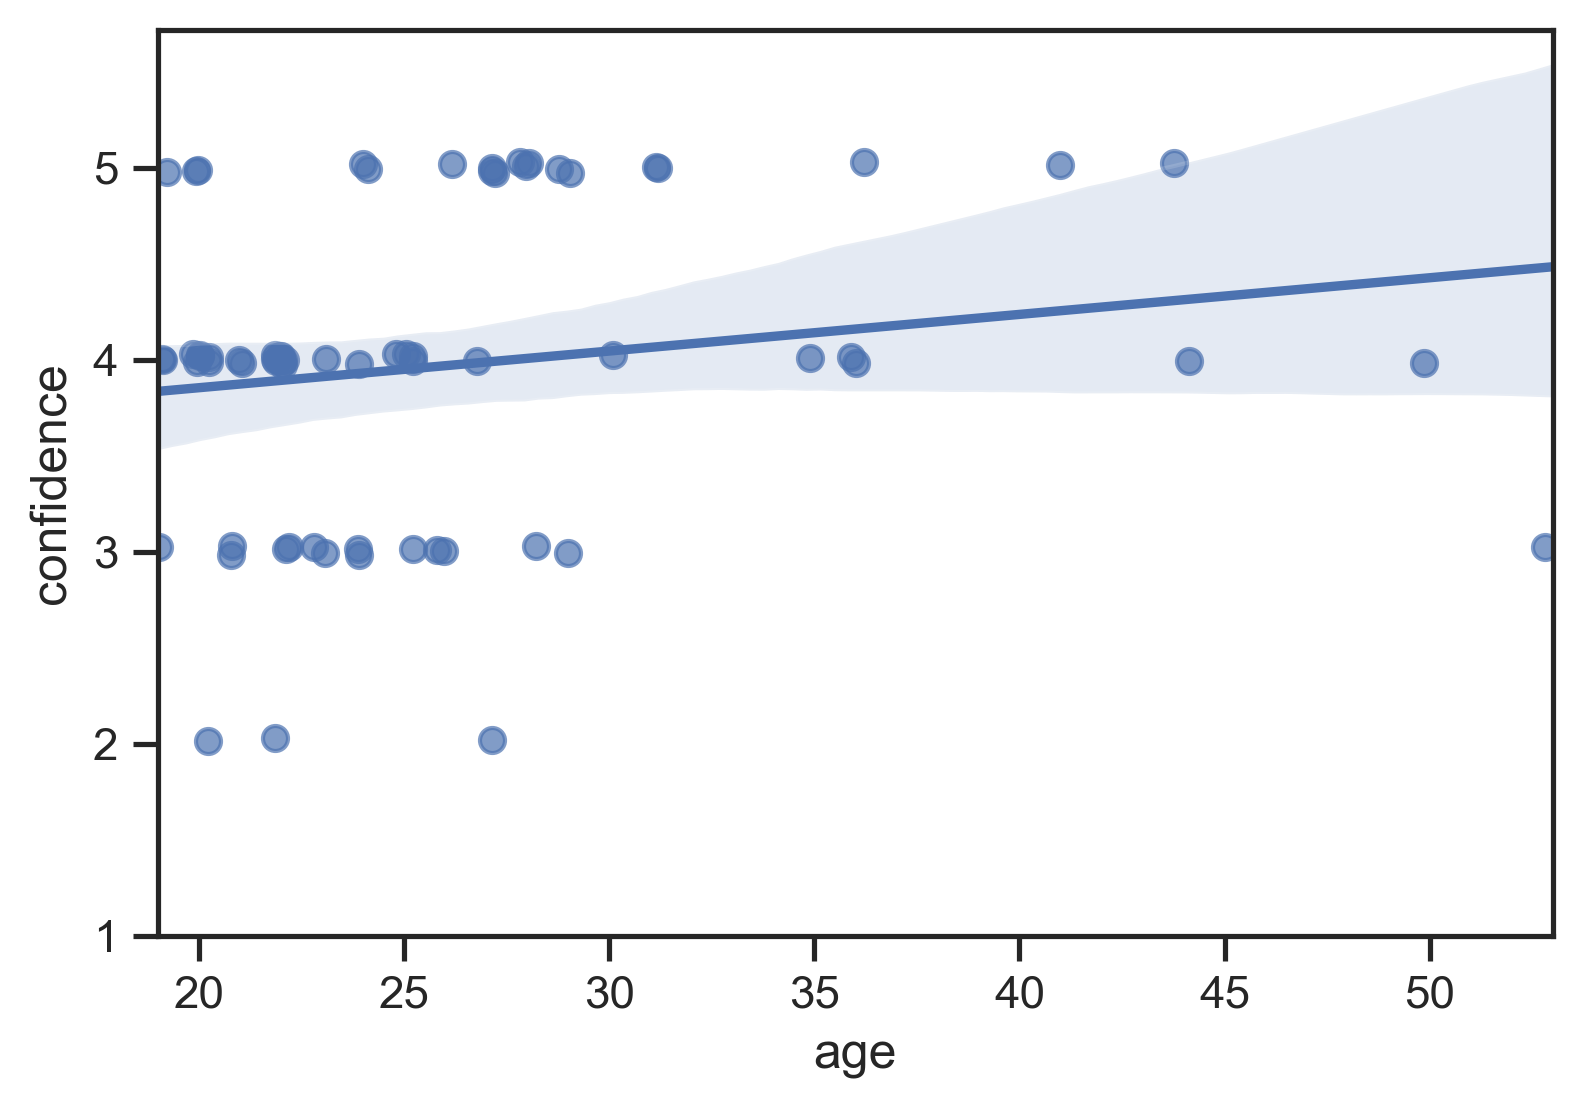

In [184]:
plot = sns.regplot(x="age", y="confidence", data=df_b, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
plot.set_yticks([1, 2, 3, 4, 5])
plot.set_yticklabels([1, 2, 3, 4, 5])
fig = plot.get_figure()
fig.savefig("group-b-age-confidence.png", dpi=300, bbox_inches = "tight")

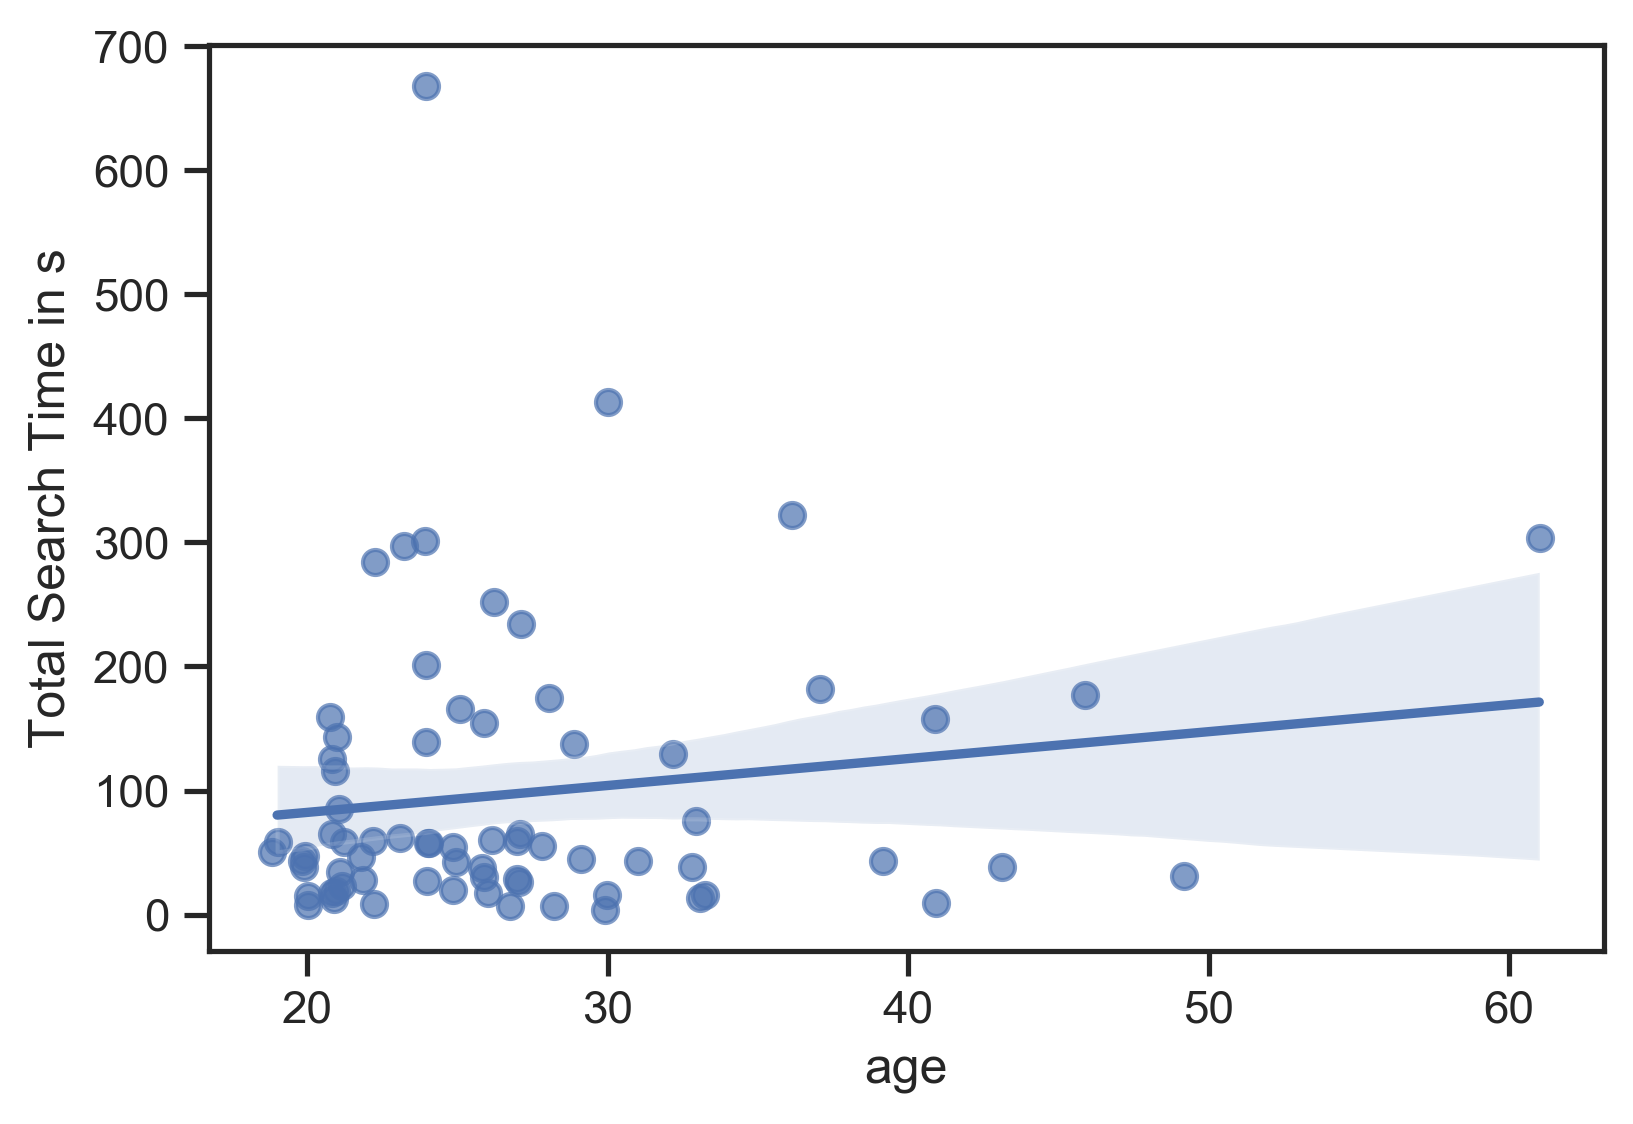

In [185]:
plot = sns.regplot(x="age", y="Total Search Time in s", data=df_c, x_jitter=.25, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-c-age-total-time.png", dpi=300, bbox_inches = "tight")

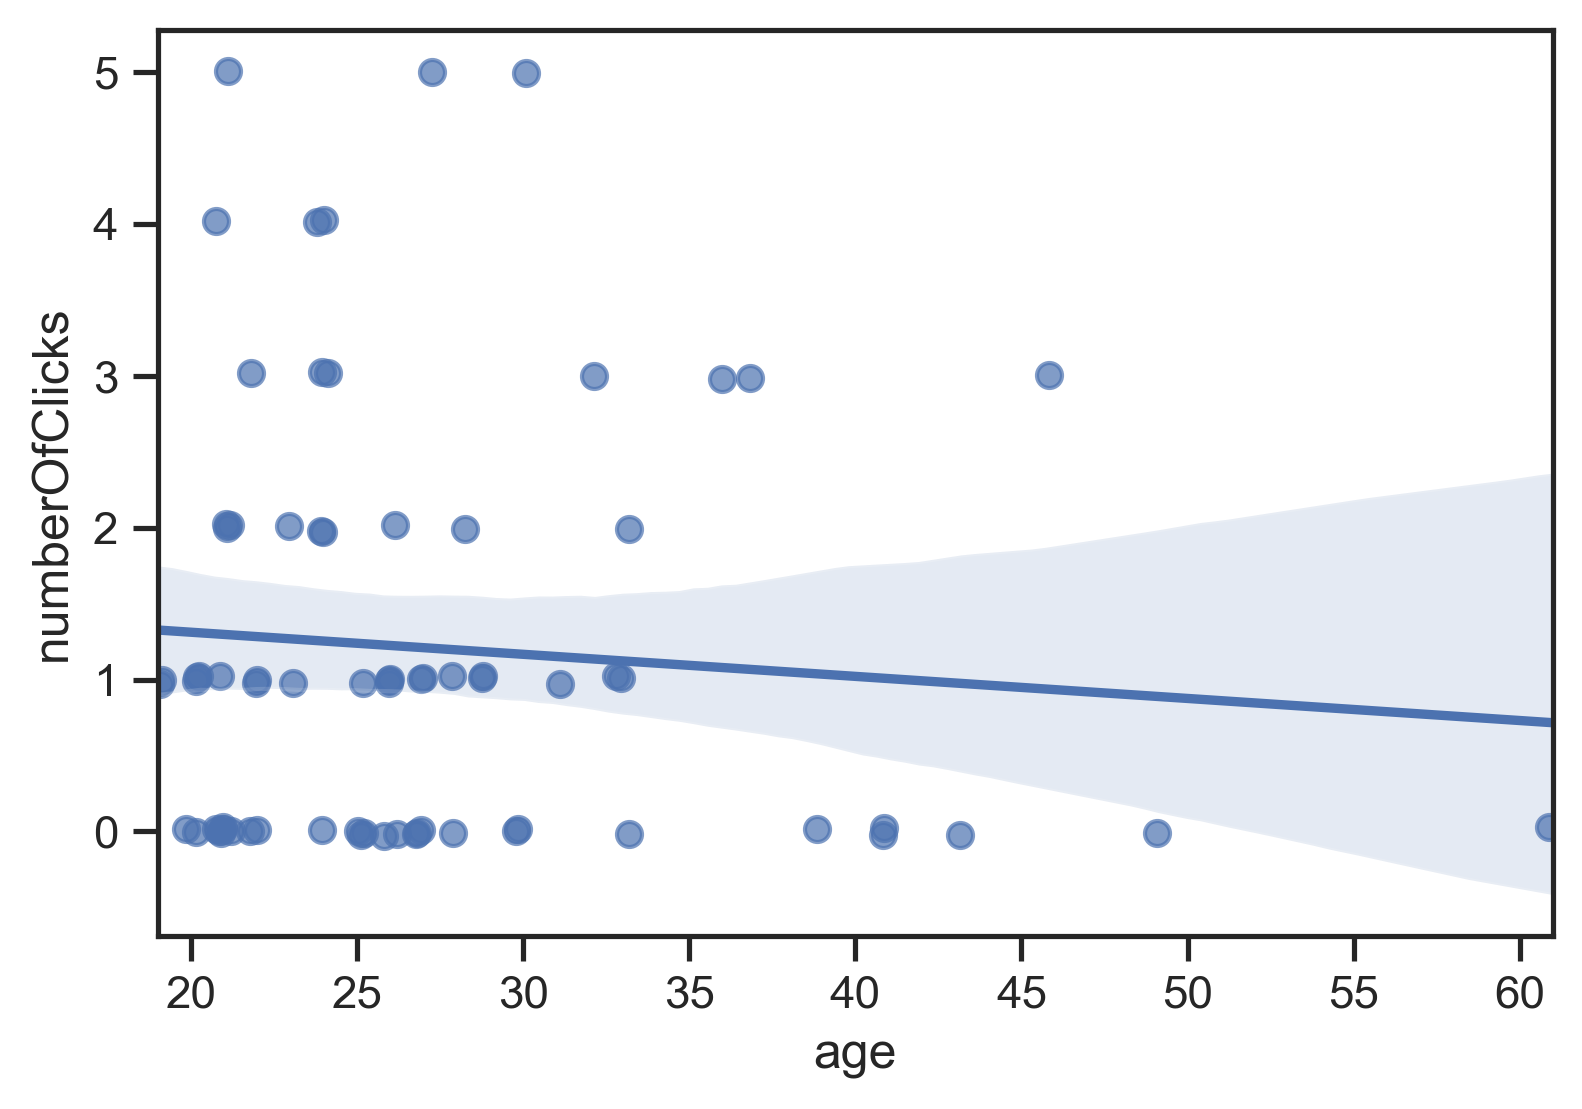

In [186]:
plot = sns.regplot(x="age", y="numberOfClicks", data=df_c, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-c-age-clicks.png", dpi=300, bbox_inches = "tight")

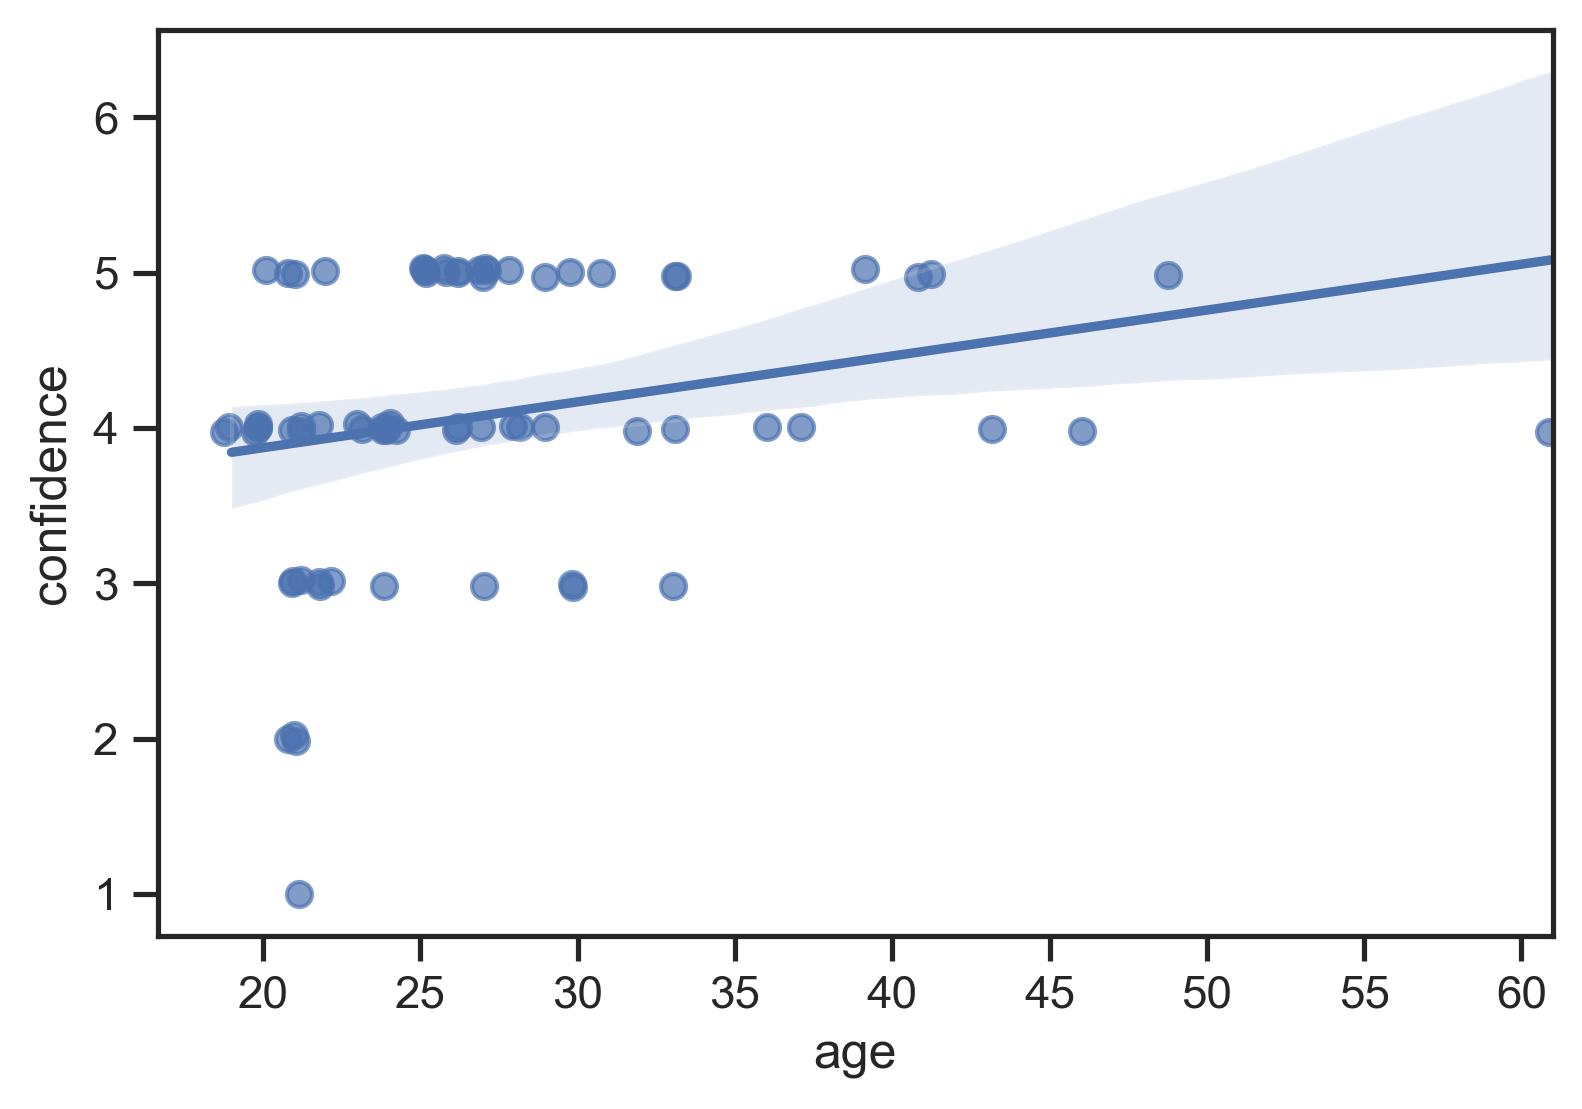

In [187]:
plot = sns.regplot(x="age", y="confidence", data=df_c, x_jitter=.25, y_jitter=.03, scatter_kws={'alpha':0.7})
fig = plot.get_figure()
fig.savefig("group-c-age-confidence.png", dpi=300, bbox_inches = "tight")